In [3]:
import pandas as pd
import os

In [4]:
os.path.abspath("../../data/dataset.csv")

'D:\\Jobb\\Siamese Fish\\data\\dataset.csv'

In [5]:
df = pd.read_csv("../../data/dataset.csv", encoding= 'unicode_escape', parse_dates=['date'])

In [6]:
df.dtypes

pit                       int64
løpernummer             float64
species                  object
length                  float64
sex                      object
spawning                float64
recap                   float64
prefix                   object
photostart                int64
photostop               float64
date             datetime64[ns]
Period                   object
dayseq                  float64
area                     object
crypto                  float64
skade                   float64
sexorig                  object
dataset                  object
nfotos                    int64
photoObs                float64
Temp_løp                float64
month                     int64
day                       int64
pit_occurance             int64
old_filename             object
new_filename             object
dtype: object

In [7]:
df = df.filter(['pit', 'date'])
df.head()

,pit,date
0,201506,2019-10-29
1,201506,2019-10-29
2,201506,2020-05-02
3,201506,2020-05-02
4,202037,2018-05-16


In [8]:
df2 = df.groupby(["pit"]).agg(["max", "min"])["date"]
df2.head()

,max,min
pit,,
65310,2018-09-09,2018-07-04
65335,2020-08-21,2018-09-05
65550,2020-08-31,2018-05-31
65722,2020-05-07,2018-05-31
65843,2018-09-08,2018-07-05


In [37]:
df3 = df2.copy()
df3["delta"] = df2["max"] - df2["min"]
df3.describe()

,delta
count,513
mean,230 days 06:47:01.052631
std,255 days 23:53:11.969149
min,0 days 00:00:00
25%,52 days 00:00:00
50%,115 days 00:00:00
75%,357 days 00:00:00
max,827 days 00:00:00


In [38]:
df3.sort_values(by='delta')

,max,min,delta
pit,,,
426137,2019-09-24,2019-09-24,0 days
420119,2018-09-06,2018-09-06,0 days
424374,2018-05-16,2018-05-16,0 days
209478,2018-07-04,2018-07-04,0 days
424315,2018-09-06,2018-09-06,0 days
...,...,...,...
67510,2020-08-31,2018-06-01,822 days
204942,2020-08-30,2018-05-31,822 days
65550,2020-08-31,2018-05-31,823 days


In [39]:
df3["Days"] = df3["delta"].astype('timedelta64[D]').astype('int')
df3["Days"]

pit
65310      67
65335     716
65550     823
65722     707
65843      65
         ... 
443992    107
443994    104
444016    103
444021    297
444040     55
Name: Days, Length: 513, dtype: int32

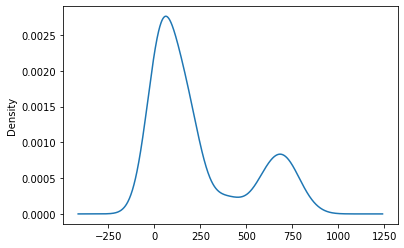

In [40]:
df3["Days"].plot.kde()

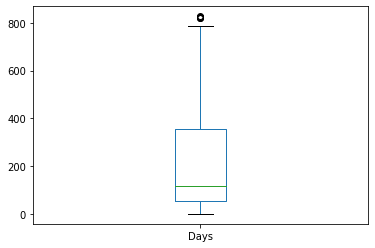

In [41]:
df3["Days"].plot.box()